# 
# Project: Medical Appointment Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
	
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row and column

I'm conducting this analysis to find insights and trends that contributed to patients showing up for appointment and to the instances the influence patient from not showing up for appointment. know 


### Question(s) for Analysis
1. To know if age factor contibutes to patient showing up for appointment or not
1. To know if Gender determines or influences the patients from showing up for appointments or not. We will also find out   
   if female were more likely to show up or male were more likely to show up for appointments.
2. We will also find out whether receiving SMS of reminders contributed to patient showing up for appointment or not
3. To know if having a particular disease contributed to patients showing up for appointment or not 


## Data Wrangling



In [1]:
#import the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns 
import datetime as dt

<a id='intro'></a>
## Data Gathering

In [2]:
# load dataset. 
df = pd.read_csv('show-appointments.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='intro'></a>
## Assessing the Data

In [3]:
df = pd.read_csv('show-appointments.csv')
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [4]:
#Let's get the number of rools and columns
df.shape

(110527, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
#Let's look at the description of our data set
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [7]:
#Let's look at the datatype
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [8]:
#Let's check for unique values 
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [11]:
#Let's check the ages and its frequency
A = df.groupby('Age')['Age'].count()
A.head(30)

Age
-1        1
 0     3539
 1     2273
 2     1618
 3     1513
 4     1299
 5     1489
 6     1521
 7     1427
 8     1424
 9     1372
 10    1274
 11    1195
 12    1092
 13    1103
 14    1118
 15    1211
 16    1402
 17    1509
 18    1487
 19    1545
 20    1437
 21    1452
 22    1376
 23    1349
 24    1242
 25    1332
 26    1283
 27    1377
 28    1448
Name: Age, dtype: int64

In [12]:
#Let's check for null values
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [13]:
#Let's check for duplicate values
df.duplicated().sum()

0


### Information gathered Assessing the Dataset

- Most of the patient do know have diseases like Diabetes, Alchoholism etc
- The mean age is 37
- The minimum age is -1 and the maximum age is 115
- The is no duplicate rows in the dataset
- The is no null value in the data set
- The data set has a mixture of string and numeric datatypes

### Cleaning to be done 
1. The AppointmentID and PatientID column needs to be dropped because it is not necessary for our analysis
2. Wrong spellings of Hipertension and Handicap needs to be corrected
3. The minimum age is -1, it needs to be dropped because it will affect our analysis so we need to check for the row that   
   has the -1 values in other to drop it
4. Let's convert ScheduledDay and AppointmentDay to datetime



<a id='eda'></a>
## Data Cleaning

In [14]:
#Let's drop the AppointmentID and PatientId Column
df.drop(['AppointmentID', 'PatientId'], axis =1, inplace =True)

In [15]:
#Let's confirm
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [16]:
#Let's identify the row that has age of -1
df.query("Age == -1")

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [17]:
#Let's drop this row
df.drop(index=99832, inplace=True)

In [18]:
#Let's confirm our changes
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [19]:
#let's convert ScheduleDay to datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])

In [20]:
#Let's convert AppointmentDay to datetime
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [21]:
#Let's confirm
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [22]:
#Let's rename Hipertension, Handcap and No-Show columns
df.rename(columns={'Hipertension':'Hypertension', 'Handcap':'Handicapped'})

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicapped,SMS_received,No-show
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,F,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No
6,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,F,2016-04-29 08:02:16,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,No
9,F,2016-04-27 12:48:25,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No


In [23]:
#let's change the Neighbourhood variable to lower case
df['Neighbourhood'].apply(lambda x: x.lower())

0           jardim da penha
1           jardim da penha
2             mata da praia
3         pontal de camburi
4           jardim da penha
5                 república
6                goiabeiras
7                goiabeiras
8                andorinhas
9                 conquista
10           nova palestina
11           nova palestina
12           nova palestina
13           nova palestina
14           nova palestina
15           nova palestina
16           nova palestina
17                conquista
18           nova palestina
19                 da penha
20           nova palestina
21                conquista
22                conquista
23                conquista
24               tabuazeiro
25                conquista
26           bento ferreira
27                conquista
28                são pedro
29             santa martha
                ...        
110497          maria ortiz
110498          maria ortiz
110499          maria ortiz
110500          maria ortiz
110501          mari

<a id='eda'></a>
## Exploratory Data Analysis

### Univariate Analysis

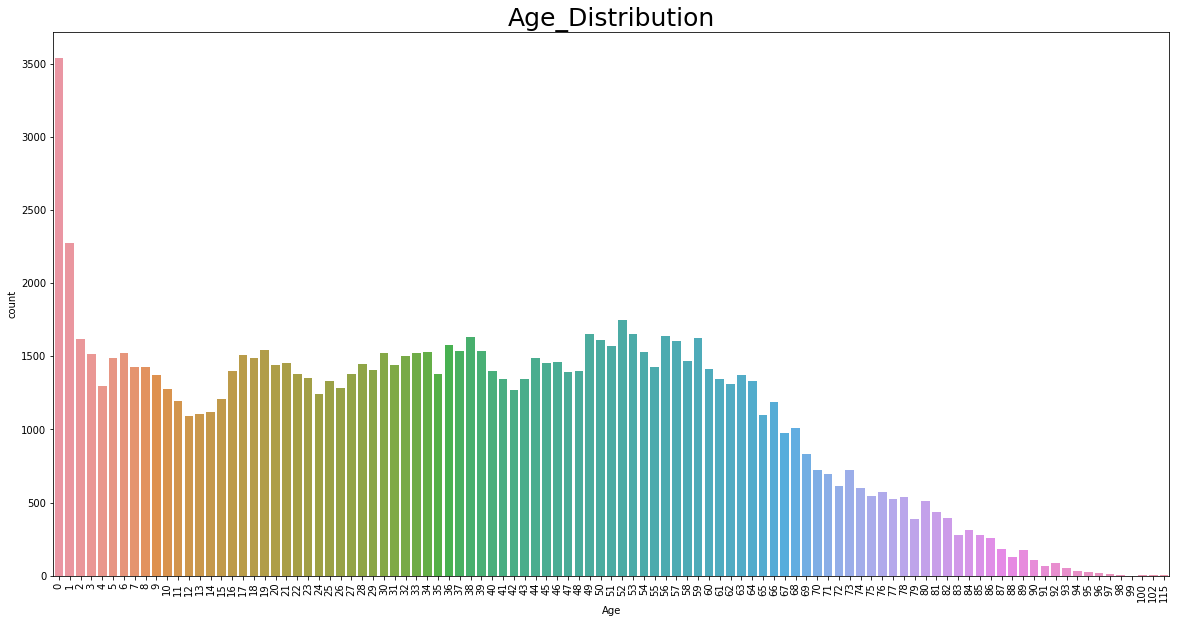

In [33]:
#Let's check the Age distribution of all Patients
plt.figure(figsize=(20,10))
sns.countplot(df['Age'])
plt.title('Age_Distribution', fontsize=25)
plt.legend(loc='right')
plt.xticks(rotation =90)
plt.show()

In [34]:
df.Age.value_counts()

0      3539
1      2273
52     1746
49     1652
53     1651
56     1635
38     1629
59     1624
2      1618
50     1613
57     1603
36     1580
51     1567
19     1545
39     1536
37     1533
54     1530
34     1526
33     1524
30     1521
6      1521
3      1513
17     1509
32     1505
5      1489
44     1487
18     1487
58     1469
46     1460
45     1453
       ... 
72      615
74      602
76      571
75      544
78      541
77      527
80      511
81      434
82      392
79      390
84      311
83      280
85      275
86      260
87      184
89      173
88      126
90      109
92       86
91       66
93       53
94       33
95       24
96       17
97       11
98        6
115       5
100       4
102       2
99        1
Name: Age, Length: 103, dtype: int64

In [35]:
#Let's check the value count of each gender
df.Gender.value_counts()

F    71839
M    38687
Name: Gender, dtype: int64

In [36]:
#Let's check the percentage of female and male

df.Gender.value_counts(normalize=True)*100

#About 65% of the patients are female while 35% are male

F    64.997376
M    35.002624
Name: Gender, dtype: float64

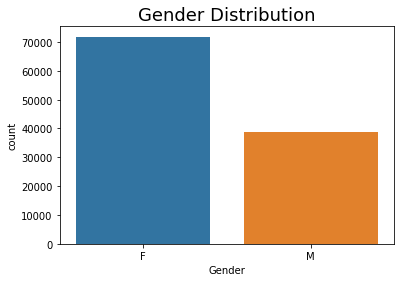

In [37]:
#Let's check the gender distribution

plt.figure(figsize=(6,4))
sns.countplot(df['Gender'])
plt.title ('Gender Distribution', Fontsize=18)
plt.show()

In [38]:
#Let's check the value count of Hypertensive Patients
df.Hipertension.value_counts()

0    88725
1    21801
Name: Hipertension, dtype: int64

In [39]:
#Let's check the percentage of hypertensive patient

df.Hipertension.value_counts(normalize=True)*100

#About 19.7% of patients were down with hypertension while 80% were free from hypertension

0    80.275229
1    19.724771
Name: Hipertension, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

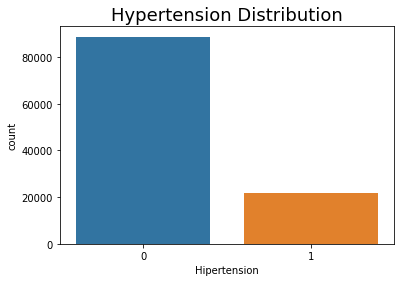

In [40]:
#Let's check the distribution of hypertensive and non hypertensive patients

plt.figure(figsize=(6,4))
sns.countplot(df['Hipertension'])
plt.title('Hypertension Distribution', fontsize = 18)
plt.show

In [41]:
#Let's check the value count of Diabetic Patients
df.Diabetes.value_counts()

0    102583
1      7943
Name: Diabetes, dtype: int64

In [42]:
#Let's check the percentage of Diabetic patient

df.Diabetes.value_counts(normalize=True)*100

#About 7.9% of patients were down with diabetes while 92.8% were free from Diabetes

0    92.813456
1     7.186544
Name: Diabetes, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

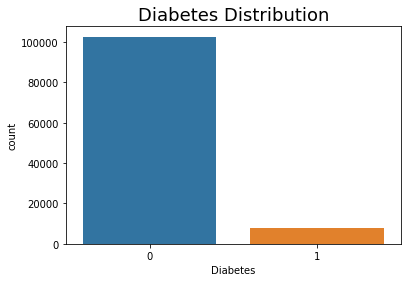

In [43]:
#Let's check the distribution of hypertensive and non hypertensive patients

plt.figure(figsize=(6,4))
sns.countplot(df['Diabetes'])
plt.title('Diabetes Distribution', fontsize = 18)
plt.show

In [44]:
#Let's check the value count of Handicapped Patients
df.Handcap.value_counts()

0    108285
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [45]:
#Let's check the percentage of Handicapped patient

df.Handcap.value_counts(normalize=True)*100

#About 1.84% of patients were down with diabetes while 97.9% were not Handicapped

0    97.972423
1     1.847529
2     0.165572
3     0.011762
4     0.002714
Name: Handcap, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

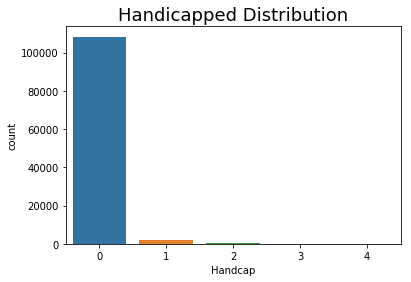

In [46]:
#Let's check the distribution of Handicapped and non handicapped patients

plt.figure(figsize=(6,4))
sns.countplot(df['Handcap'])
plt.title('Handicapped Distribution', fontsize = 18)
plt.show

In [47]:
#Let's check the value count of patients that received SMS
df.SMS_received.value_counts()

0    75044
1    35482
Name: SMS_received, dtype: int64

In [48]:
#Let's check the percentage of patients that received SMS

df.SMS_received.value_counts(normalize=True)*100

#About 67.9% of patients did not received SMS while 32.1% received SMS

0    67.897146
1    32.102854
Name: SMS_received, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

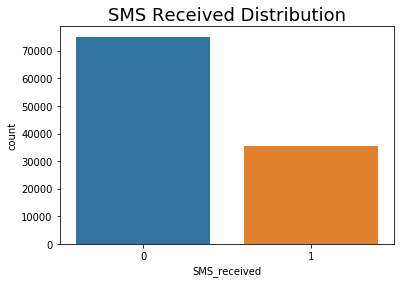

In [49]:
#Let's check the distribution of SMS received among patients

plt.figure(figsize=(6,4))
sns.countplot(df['SMS_received'])
plt.title('SMS Received Distribution', fontsize = 18)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

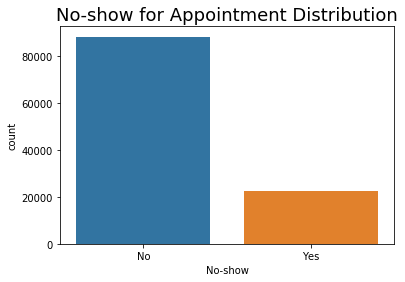

In [50]:
#Let's check the distribution of No show for Appointments by patients

plt.figure(figsize=(6,4))
sns.countplot(df['No-show'])
plt.title('No-show for Appointment Distribution', fontsize = 18)
plt.show

#### According to the dataset in the No-Show column, The No represents patients that showed up for while the Yes  indicate people that didn't show up for the appointment.

#### We can therefore deduce from the chart that over 80,000 patients showed up for the appointment while over 20,000 patients did not show up for the appointment representing over 80% response to the appointment







<a id='eda'></a>
## Bivariate Analysis

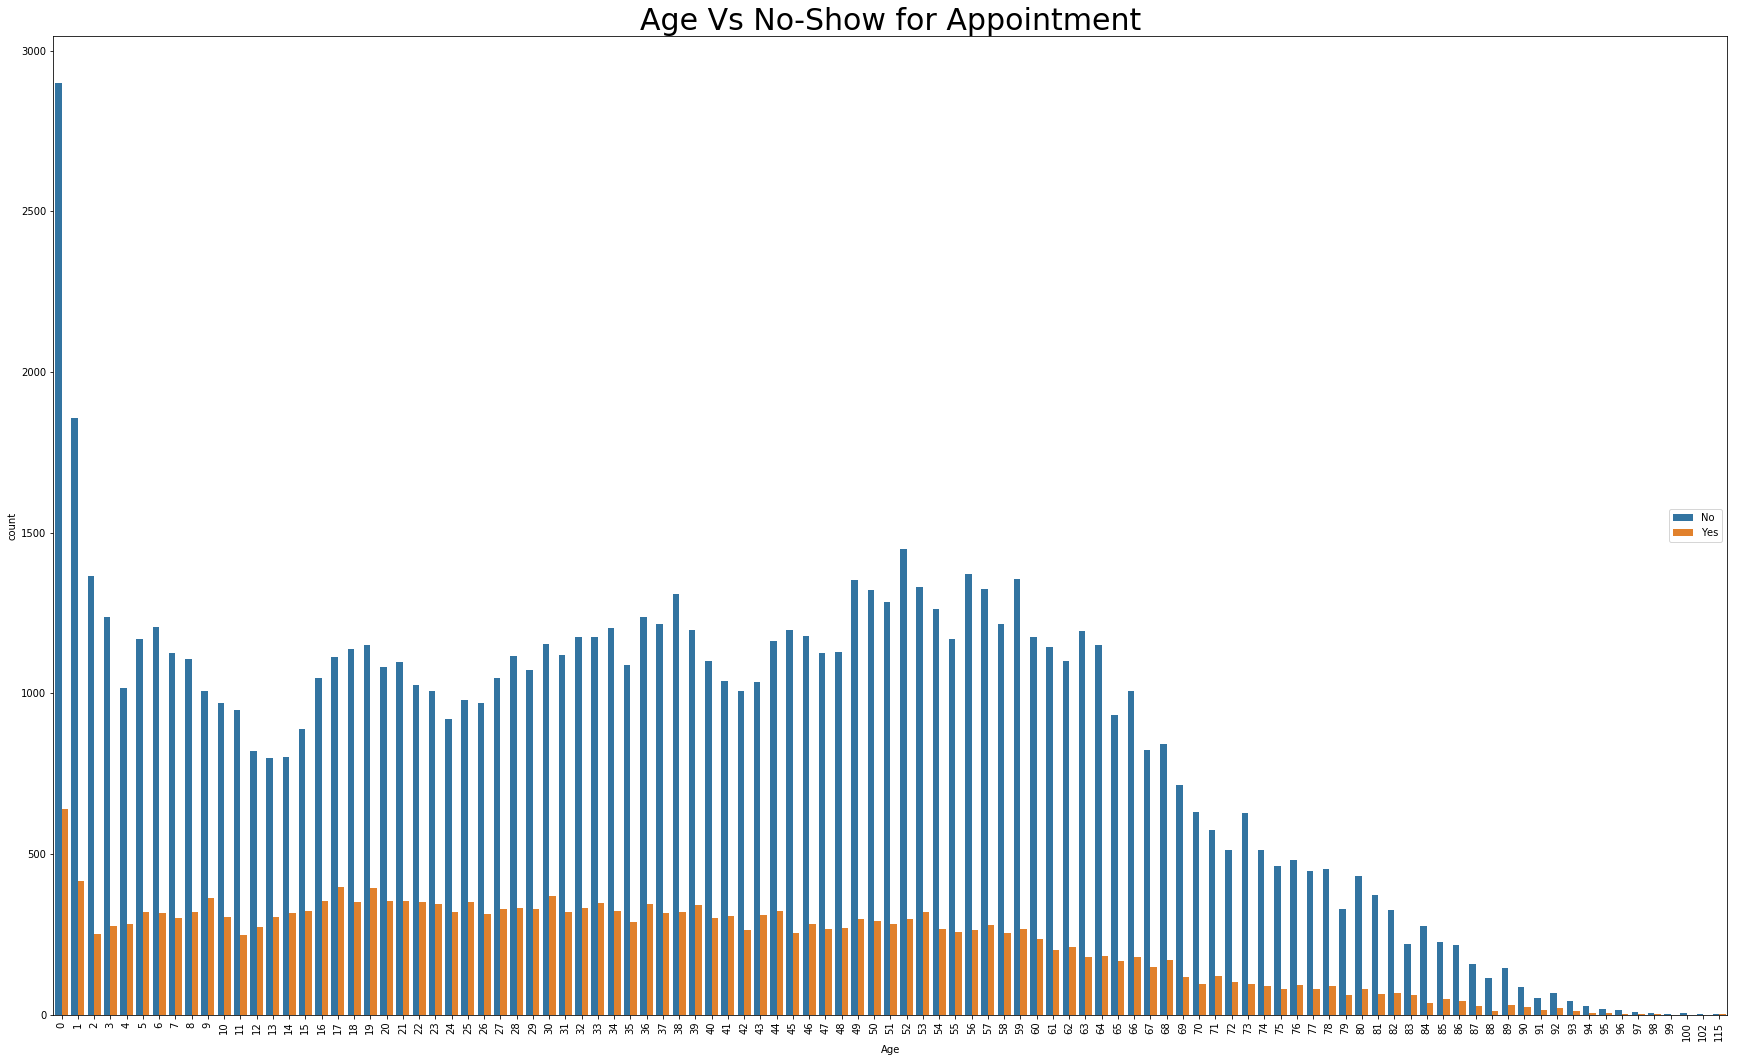

In [53]:
#Let's check if Gender determines Patient showing up for appointment or not

plt.figure(figsize=(30,18))
sns.countplot(x='Age', hue='No-show', data=df)
plt.title('Age Vs No-Show for Appointment', fontsize=30)
plt.legend(loc='right')
plt.xticks(rotation =90)
plt.show()





<a id='eda'></a>
#### Patients between the ages of 0-60 were more likely to show up for appointment that patient between the age of 70-115

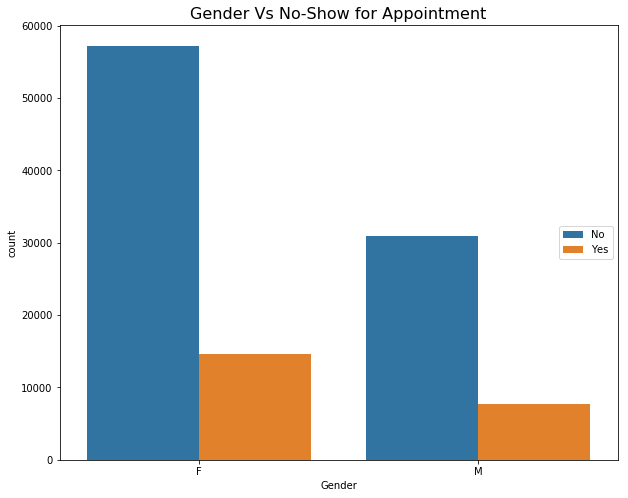

In [69]:
#Let's check if Gender determines Patient showing up for appointment or not

plt.figure(figsize=(10,8))
sns.countplot(x='Gender', hue='No-show', data=df)
plt.title('Gender Vs No-Show for Appointment', fontsize=16)
plt.legend(loc='right')
plt.show()

In [70]:
#Let's get the value count
df.groupby('Gender')['No-show'].value_counts()

Gender  No-show
F       No         57245
        Yes        14594
M       No         30962
        Yes         7725
Name: No-show, dtype: int64

In [71]:
#Let's get the percentage
df.groupby('Gender')['No-show'].value_counts(normalize=True)*100

Gender  No-show
F       No         79.685129
        Yes        20.314871
M       No         80.032052
        Yes        19.967948
Name: No-show, dtype: float64

#### From the Bar chart and the percentage calculations above for the distribution of Gender and their response to appoinment. The percentage of female that showed up for appointment is 79.6% while that of male is 80% . Both male and female were more likely to show up for appointment.




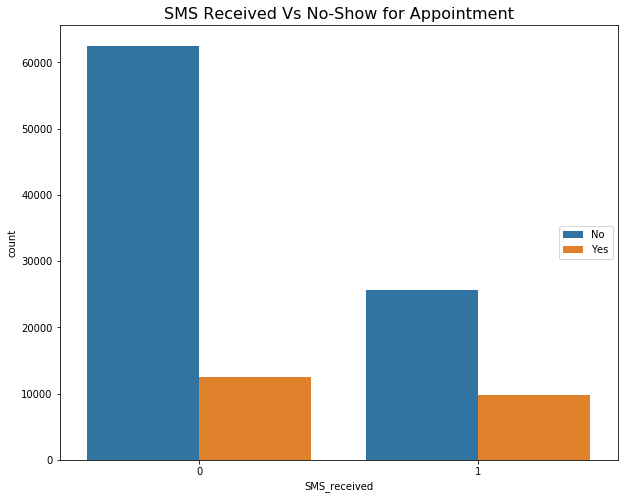

In [72]:
#Let's check if receiving SMS determines Patient showing up for appointment or not

plt.figure(figsize=(10,8))
sns.countplot(x='SMS_received', hue='No-show', data=df)
plt.title('SMS Received Vs No-Show for Appointment', fontsize=16)
plt.legend(loc='right')
plt.show()

In [73]:
#Let's get the value counts
df.groupby('SMS_received')['No-show'].value_counts()

SMS_received  No-show
0             No         62509
              Yes        12535
1             No         25698
              Yes         9784
Name: No-show, dtype: int64

In [74]:
#Let's get the percentage
df.groupby('SMS_received')['No-show'].value_counts(normalize=True)*100

SMS_received  No-show
0             No         83.296466
              Yes        16.703534
1             No         72.425455
              Yes        27.574545
Name: No-show, dtype: float64

#### From the Bar chart and the percentage calculations above for the distribution of Patients that received SMS or not and their response to appoinment. 

#### Most of the patients did not receive SMS notifications , 83% of the people that did not received SMS showed up for the appointment while 72% of thoses that received SMS showed up for appoinment

#### In otherwords people that did not received SMS showed up more than those that received SMS



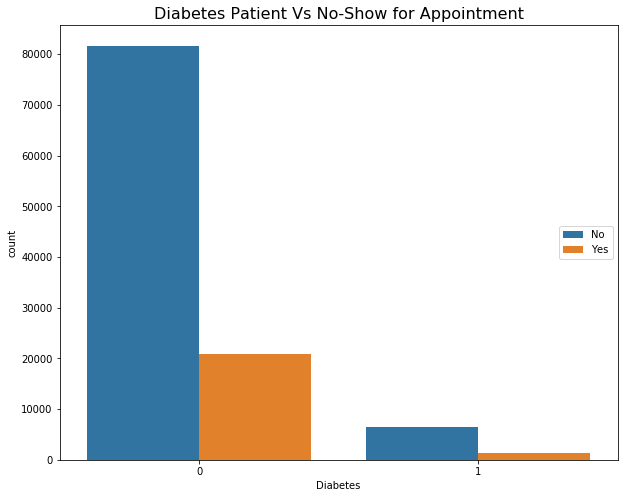

In [75]:
#Let's determine if patients with Diabetes showed up more for appointment or not Sappoint

plt.figure(figsize=(10,8))
sns.countplot(x='Diabetes', hue='No-show', data=df)
plt.title('Diabetes Patient Vs No-Show for Appointment', fontsize=16)
plt.legend(loc='right')
plt.show()

In [76]:
#Let's get the value counts
df.groupby('Diabetes')['No-show'].value_counts()

Diabetes  No-show
0         No         81694
          Yes        20889
1         No          6513
          Yes         1430
Name: No-show, dtype: int64

In [77]:
#Let's get the percentage
df.groupby('Diabetes')['No-show'].value_counts(normalize=True)*100

Diabetes  No-show
0         No         79.636977
          Yes        20.363023
1         No         81.996727
          Yes        18.003273
Name: No-show, dtype: float64

#### From the Bar chart and the percentage calculations above for the distribution of Diabetic Patients and their response to appoinment. 

#### More percentage of patient with Diabetes showed up for appointment that those without Diabetes.



<a id='conclusions'></a>
## Conclusions

In conclusion, I have been able to find out that people within the age of 0-60 responded more to meeting appointment than people within the age of 80-115.

I have also been able to find out that both male and female responded most likely to appointment. 

Patient who didn't received SMS were most likely to show up for appointment

Patients with Diabetes responded more to appointment


## Limitations

The dataset was not comprehensive as it was lacking some columns

The No-show appointment column was confusing at first




Reference
www.github.com
www.stackoverflow.com



In [87]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0